Spotify Dataset:


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390



Turkish Dataset:


,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,relax,0.052,0.591,9.136,130.043,3.997,0.363,0.887,0.078,0.221,...,0.426,1.000,0.008,0.101,0.316,0.261,0.018,1.035,0.593,0.970
1,relax,0.125,0.439,6.680,142.240,4.058,0.516,0.785,0.397,0.556,...,0.002,1.000,0.000,0.984,0.285,0.211,-0.082,3.364,0.702,0.967
2,relax,0.046,0.639,10.578,188.154,2.775,0.903,0.502,0.329,0.287,...,0.184,0.746,0.016,1.000,0.413,0.299,0.134,1.682,0.692,0.963
3,relax,0.135,0.603,10.442,65.991,2.841,1.552,0.612,0.351,0.011,...,0.038,1.000,0.161,0.757,0.422,0.265,0.042,0.354,0.743,0.968
4,relax,0.066,0.591,9.769,88.890,3.217,0.228,0.814,0.096,0.434,...,0.004,0.404,1.000,0.001,0.345,0.261,0.089,0.748,0.674,0.957



Mood Distribution:
 Mood
Happy        80303
Angry        66667
Depressed    64913
Calm         20841
Name: count, dtype: int64


C:\Users\Nitro5\AppData\Local\Temp\ipykernel_11356\4218095812.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=spotify_df, x='Mood', palette='coolwarm')


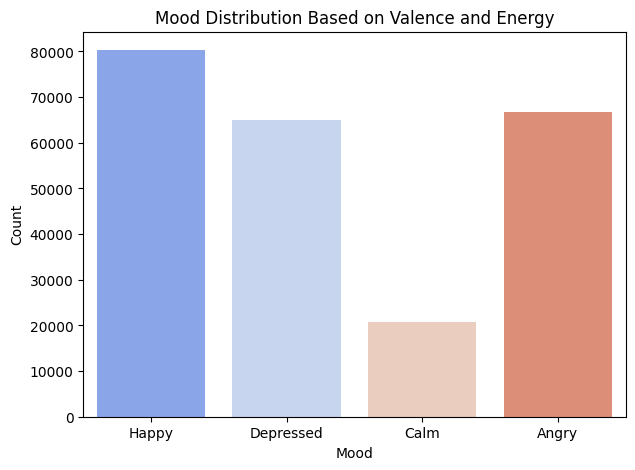

c:\Users\Nitro5\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


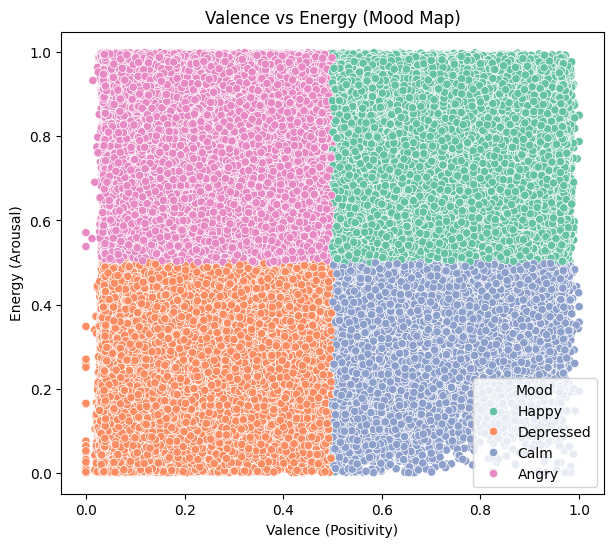


⚠️ Mental Health Warning: 64913 songs detected as 'Depressed' mood.
Here are some happier tracks to uplift your mood:



,track_name,genre,valence,energy
61477,Uhh Ahh,R&B,0.633,0.652
164758,Dobla Rodilla,Reggaeton,0.626,0.757
179987,Hurt So Bad,Jazz,0.850,0.519
152951,Say Aah (feat. Fabolous),R&B,0.810,0.870
36907,Don't Hate The 808 (G Jones Remix),Electronic,0.599,0.873


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
spotify_df = pd.read_csv("SpotifyFeatures.csv")
turkish_df = pd.read_csv("Acoustic Features.csv")

# Display sample data
print("Spotify Dataset:")
display(spotify_df.head())
print("\nTurkish Dataset:")
display(turkish_df.head())

# Select relevant columns
spotify_df = spotify_df[['genre', 'track_name', 'valence', 'energy', 'danceability', 'tempo']]
spotify_df = spotify_df.dropna()

# Function to classify mood based on valence and energy
def classify_mood(valence, energy):
    if valence >= 0.5 and energy >= 0.5:
        return "Happy"
    elif valence < 0.5 and energy >= 0.5:
        return "Angry"
    elif valence < 0.5 and energy < 0.5:
        return "Depressed"
    else:
        return "Calm"

spotify_df['Mood'] = spotify_df.apply(lambda x: classify_mood(x['valence'], x['energy']), axis=1)

# Count of each mood
mood_counts = spotify_df['Mood'].value_counts()
print("\nMood Distribution:\n", mood_counts)

# Visualize mood distribution
plt.figure(figsize=(7,5))
sns.countplot(data=spotify_df, x='Mood', palette='coolwarm')
plt.title("Mood Distribution Based on Valence and Energy")
plt.xlabel("Mood")
plt.ylabel("Count")
plt.show()

# Scatter plot - Valence vs Energy
plt.figure(figsize=(7,6))
sns.scatterplot(data=spotify_df, x='valence', y='energy', hue='Mood', palette='Set2')
plt.title("Valence vs Energy (Mood Map)")
plt.xlabel("Valence (Positivity)")
plt.ylabel("Energy (Arousal)")
plt.show()

# 🧭 Mental health warning
depressed_songs = spotify_df[spotify_df['Mood'] == "Depressed"]
if len(depressed_songs) > 0:
    print(f"\n⚠️ Mental Health Warning: {len(depressed_songs)} songs detected as 'Depressed' mood.")
    print("Here are some happier tracks to uplift your mood:\n")
    happy_tracks = spotify_df[spotify_df['Mood'] == "Happy"].sample(5, random_state=42)
    display(happy_tracks[['track_name', 'genre', 'valence', 'energy']])
else:
    print("\n✅ No depressive songs detected. You're vibing well!")

# Optional: Check Turkish dataset mood distribution
if 'valence' in turkish_df.columns and 'energy' in turkish_df.columns:
    turkish_df['Mood'] = turkish_df.apply(lambda x: classify_mood(x['valence'], x['energy']), axis=1)
    print("\nTurkish Dataset Mood Summary:")
    display(turkish_df['Mood'].value_counts())
